In [39]:
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

ds = load_digits()
X = ds.data/16.0-0.5
y = ds.target

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))

(1797, 64)
(1797,)
-0.5 0.5
[0 1 2 3 4 5 6 7 8 9]


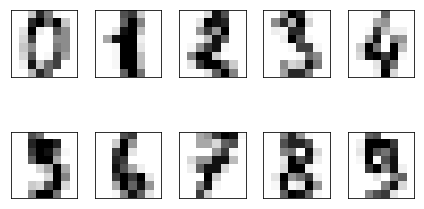

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

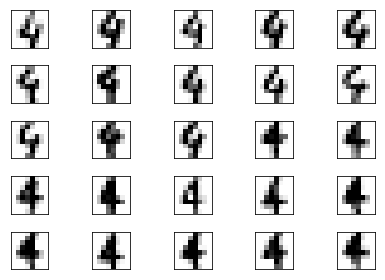

In [41]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
digit = 4
x_digits = X[y == digit]
for i in range(25):
    img = x_digits[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


### Helper methods

In [43]:
#!/usr/bin/env

__filename__ = "latex_doc_strings.py"
__author__ = "L.J. Brown"

import re
from IPython.display import display, Math, Latex

def extract_doc_latex(method):
    """
        looks for latex in doc strings of passes method.
        
        Format example for docstring:
        
            r\""" 
                    Foo Method Description 

                :latex: MULTI-LINE
                        LATEX EXPRESSION
                        INSERTED HERE
                        
                :param bar: (example parameter)
                :returns: (whatever) 

                * [Notes] : 
                
                    - latex code must be followed by 
                        at least one ':'(like the one 
                        leading param above)
                        
                    - doc string must be proceeded by r\""" 
            \"""
            
        :param: method with string literal doc string containing latex
        :returns: latex string literal
        
    """
    p = re.compile('(?:\:latex\:)([\s\S]+?)(?:\:)', re.MULTILINE)
    m = p.search(method.__doc__)
    return m.group(1)

def latex_doc(method):
    """
    returns rendered latex from doc string of method passed as parameter

    Format example for docstring:

            r\""" 
                    Foo Method Description 

                :latex: MULTI-LINE
                        LATEX EXPRESSION
                        INSERTED HERE

                :param bar: (example parameter)
                :returns: (whatever) 

                * [Notes] : 

                    - latex code must be followed by 
                        at least one ':'(like the one 
                        leading param above)

                    - doc string must be proceeded by r\""" 
            \"""

    :param: method with string literal doc string containing latex
    :returns: formated latex expression

    """  

    latex_string = extract_doc_latex(method)
    return display(Math(latex_string))

In [44]:
def add_bias_unit(A):
    r"""
        Add  bias units (column of 1s) to array at index 0
        
       :latex: 
       
               \text{Takes as input paramater a matrix $\mathbf{A}_{s \times n}$,} \\
               \text{ }\\
               \mathbf{A}_{ input } =
                \begin{bmatrix}
                     \text{---} & a^{(0)}    & \text{---} \\
                                & \vdots     &            \\
                     \text{---} & a^{(s-1)}  & \text{---} \\
                \end{bmatrix}
                \text{ }\\
                \text{ }\\
                \text{Where '$s$' is the number of instances being fed to the network.}\\
                \\\\
                \text{ }\\
                \text{Adds a bias column to the first column of $\mathbf{A}$ and returns the new matrix $\mathbf{A'}_{s \times n+1}$, }\\
                \text{ }\\
                \mathbf{A'}_{column \, bias} =
                \begin{bmatrix}
                     1     &  \text{---} & a^{(0)}    & \text{---} \\
                   \       &             & \vdots     &            \\
                     1     &  \text{---} & a^{(s-1)}  & \text{---} \\
                \end{bmatrix}
                
       :param A: numpy array to add bias row or column to
    """
    ones = np.ones((A.shape[0], 1))
    A_new = np.hstack((ones, A))

    return A_new

latex_doc(add_bias_unit)

<IPython.core.display.Math object>

In [45]:
def build_weight_matrix(num_input_units, num_output_units):
    r"""
        Build Weight Matrix W for layer l given number of inputs and outputs.
        Initialize weights with small random numbers.
          
       :latex: \text{ Constructs Weight Matrix $\mathbf{W}_{n \times m}^{(l)}$. } \\ \\
               \text{ }\\
               \text{ Initalizes weights using a random uniform distribution ranging from $[-1,1]$.} \\
               \text{ Number of input units, } n  \\
               \text{ Number of output units, } m \\
               \text{ }\\
               \mathbf{W}^{(l)} =
               \begin{bmatrix}
                    b_{0}   & \ldots  & b_{m-1} \\
                    w_{1,0} & \ldots  & w_{1,m-1} \\
                    \vdots  & \ldots  & \vdots \\
                    w_{n-1,0} & \ldots  & w_{n-1,m-1}
               \end{bmatrix} \\
    \text{ This matrix is used in conjustion with layer $l's$ activation matrix $\mathbf{A}^{(l)}$ }\\
    \text{ to calculate the input matrix $\mathbf{Z}^{(l)}$ to the next activation function.} \\
    \\
    \text{ }\\
    \text{ }\\
    \text{If '$s$' be the number of instances being fed to the network then,}\\
    \mathbf{Z}_{s \times m}^{(l)} = \mathbf{A}_{s \times n}^{(l)} \mathbf{W}_{n \times m}^{(l)} \\
    \text{ }\\
    \mathbf{Z} =
    \begin{bmatrix} 
            \text{---} &  z^{(0)}   & \text{---} \\
                       & \ldots     &            \\
            \text{---} &  z^{(s-1)} & \text{---} \\
    \end{bmatrix} , \;
    
    \begin{bmatrix} 
            1       & \text{---} &  a^{(0)}   & \text{---} \\
           \vdots   &            & \ldots     &            \\
            1       & \text{---} &  a^{(s-1)} & \text{---} \\
    \end{bmatrix}
    = \mathbf{A} \\
    
    \text{ }\\
    \text{Returns randomly initalized weight matrix $\mathbf{W}_{n \times m}^{(l)}.$}
    
    
      :param num_input_units: integer, number of rows in W representing the number of outputs from the previous layer (neglecting the bias terms), or the number of features for the network inputs (again neglecting the bias terms).
      :param num_output_units: integer, number of columns in W representing the number input units for the next layer (neglecting the bias terms), or the number of classes for the networks output.
    """
    W_num_elems = num_input_units * num_output_units
    
    W = np.random.uniform(-1.0, 1.0, size=W_num_elems)
    W = W.reshape(num_input_units, num_output_units) # reshape to be W
    
    return W

latex_doc(build_weight_matrix)

<IPython.core.display.Math object>

## Feed Forward And DNN Network Dimensions

<br/>

### Size variable definitions

Let $L$ be the total number of layers in the network, 
$$ l = 0, 1, ..., L_{-1} $$

We'll denote the layer for particular component of the network with the superscript $ \mathbf{\xi}^{(l)} $ if it is a function or a matrix. If the component is a particular instance traveling through the network then the superscript refers to the instance number.

$$
 s \, \sim \, \text{ The number of input samples to the network : n_samples } \\
 f \, \sim \, \text{ The number of features for every sample : n_features } \\
 c \, \sim \, \text{ The number of classes the network can classify : n_classes } \\
 L \, \sim \, \text{ The total number of layers in the network : n_layers } \\
 l \, \sim \, \text{ The particular layer of the component in focus } \\
 in^{(l)} \, \sim \, \text{ The number of input units to layer $l$ : layers[ l ].n_inputs } \\
 out^{(l)} \, \sim \, \text{ the number of output units from layer $l$ : lares[ l ].n_outputs } \\
$$

### Network Components And Dimensions

$$
\mathbf{X}_{( \, s \, \times \, f \, ) } \, \sim \, \text{ Input samples to the network } \\
\mathbf{\tilde{Y}}_{( \, s \, \times \, c \, ) } \, \sim \, \text{ The out put of the network } \\
\mathbf{A}^{(l)}_{ ( \, s \, \times \, in^{(l)} \, )} \, \sim \, \text{ The activations traveling through the network at layer $l$ } \\
\mathbf{A'}^{(l)}_{( \, s \, \times \, in^{(l)}+1 \, ) } \, \sim \, \text{ The activations traveling through the network at layer $l$ plus the bias column of ones added to $ \mathbf{A}^{(l)} $ at index $0$ } \\
\mathbf{W}^{(l)}_{ ( \, in^{(l)}+1 \, \times \, out^{(l)} \, ) } \, \sim \, \text{ The weight matrix of the network at layer $l$ } \\
\mathbf{Z}^{(l)}_{( \, s \, \times \, out^{(l)} \, ) } \, \sim \, \text{ Intermediate Component, 
$\mathbf{Z}^{(l)} = \mathbf{A'}^{(l)} \mathbf{W}^{(l)}  $ } \\
\phi^{(l)}  \, \sim \, \text{ The activation function of layer $l$. Layer $l$'s output is defined as $\phi^{(l)}( \, \mathbf{Z}^{(l)} \, )$ } \\
$$

### Detailed Description of Network Components
$$
\text{ $\mathbf{X}$ is the input to the network.} \\ 
\text{ It is a matrix of row vectors. Each row is a particular instance denoted by it's superscript. } \\
\mathbf{X}_{( \, s \, \times \, f \, ) } =
    \begin{bmatrix}
         \text{---} & x^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & x^{(s-1)}  & \text{---} \\
    \end{bmatrix}
$$

$$
\text{ $\mathbf{A}^{(l)}$ is the input to layer $l$ of the network. } \\
\text{ $\mathbf{A}^{(l)}$ is again a matrix of row vectors corresponsing to a particular samples activations traveling through the network. } \\
\mathbf{A}^{(l)}_{( \, s \, \times \, in^{(l)} \, ) } =
    \begin{bmatrix}
         \text{---} & a^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & a^{(s-1)}  & \text{---} \\
    \end{bmatrix}
$$

$$
\text{ $\mathbf{A'}^{(l)}$ is the input to layer $l$ of the network with the addition of a bias column of $1$'s at index $0$. } \\
\mathbf{A'}^{(l)}_{( \, s \, \times \, in^{(l)}+1 \, ) } =
    \begin{bmatrix} 
            1       & \text{---} &  a^{(0)}   & \text{---} \\
           \vdots   &            & \ldots     &            \\
            1       & \text{---} &  a^{(s-1)} & \text{---} \\
    \end{bmatrix}
$$

$$
\text{ $\mathbf{W}^{(l)}$ is the weight matrix of layer $l$ of the network. } \\
\text{ The first row of $\mathbf{W}^{(l)}$ is made up of biases not connected to the input for the layer. } \\
\mathbf{W}^{(l)}_{( \, in^{(l)}+1 \, \times \, out^{(l)} \, ) } =
   \begin{bmatrix}
        b_{0}   & \ldots  & b_{out^{(l)}-1} \\
        w_{1,0} & \ldots  & w_{1, \, out^{(l)} -1} \\
        \vdots  & \ldots  & \vdots \\
        w_{in^{(l)},0} & \ldots  & w_{in^{(l)}, \, out^{(l)} -1 }
   \end{bmatrix} \\
$$

$$
\text{ $\mathbf{Z}^{(l)}$ is an intermidiate matrix for layer $l$.} \\ 
\text{ It is a matrix of row vectors. Each row corresponds to a particular instance of a sample traveling through the network. } \\
\mathbf{Z}^{(l)}_{( \, s \, \times \, out^{(l)} \, ) } =
    \begin{bmatrix}
         \text{---} & z^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & z^{(s-1)}  & \text{---} \\
    \end{bmatrix}
$$

$$
\text{ $\mathbf{\tilde{Y}}$ is the output of the network.} \\ 
\text{ It is a matrix of row vectors. Each row corresponds to the predictions for a sample traveling passed to the matrix.} \\
\text{ Each column represents a class. Each element a score for that class. } \\
\mathbf{\tilde{Y}}_{( \, s \, \times \, c \, ) } =
 \begin{bmatrix}
         \text{---} & \tilde{y}^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & \tilde{y}^{(s-1)}  & \text{---} \\
\end{bmatrix}, \;
\begin{bmatrix}
    \vert             &        & \vert       \\
    score_{class_0}   & \ldots & score_{class_{c-1}} \\
    \vert             &        & \vert
\end{bmatrix}
= \mathbf{\tilde{Y}}_{( \, s \, \times \, c \, ) }
$$

## Feed Forward

<br/>

### Network Compnent Relations

The input to the network is a group of samples to classify. <br/>
The samples are placed into rows of a matrix,
$$
\mathbf{X}_{( \, s \, \times \, f \, ) } =
\begin{bmatrix}
     \text{---} & x^{(0)}    & \text{---} \\
                & \vdots     &            \\
     \text{---} & x^{(s-1)}  & \text{---} \\
\end{bmatrix}\\
$$

We give the network $\mathbf{X}$ and it spits out its predictions,
$$
\mathbf{\tilde{Y}} = \mathbf{N}( \, X \, )
$$
The networks output predictions, $ \mathbf{\tilde{Y}} $, are bundled just like its input ( with a corresponding sample in every row ),
$$
\mathbf{\tilde{Y}}_{( \, s \, \times \, c \, ) } =
 \begin{bmatrix}
         \text{---} & \tilde{y}^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & \tilde{y}^{(s-1)}  & \text{---} \\
\end{bmatrix}
$$
Each column of its output represents a class and each element a score, <br/>
$$
\mathbf{\tilde{Y}}_{( \, s \, \times \, c \, ) } = 
\begin{bmatrix}
    \vert             &        & \vert       \\
    score_{class_0}   & \ldots & score_{class_{c-1}} \\
    \vert             &        & \vert
\end{bmatrix}
$$

<center> Now the Networks prediction for $\mathbf{X}[i,:]$ is its output $\mathbf{Y}[:,i]$</center>

$$ 
x =
\begin{bmatrix} f_0, & \, \ldots & \, f_{n-1} \end{bmatrix}  \hspace{1cm}
\rightarrow
\mathbf{\text{NETWORK}}
\rightarrow  \hspace{1cm}
\begin{bmatrix}
       score_{c_{0}} \\
       \vdots \\
       score_{c_{p-1}}
\end{bmatrix}
= \tilde{y}
$$

### Network internals for feed forward process ( inside $ \mathbf{N}( \, X \, ) = \mathbf{\tilde{Y}} \\ $ ), 
#### We put $\mathbf{X}$ through every layer of the network in the same manner. It travels along as activations, $\mathbf{A}^{(l)}$ and $\mathbf{Z}^{(l)}$ until finally spit out as $\mathbf{\tilde{Y}}$. But it keeps the same structure ( rows of a matrix ) only its columns may be squeezed or streched as it feeds forward.

$$
\mathbf{X}_{( \, s \, \times \, f \, ) } =
\begin{bmatrix}
     \text{---} & x^{(0)}    & \text{---} \\
                & \vdots     &            \\
     \text{---} & x^{(s-1)}  & \text{---} \\
\end{bmatrix}, \; \;
\mathbf{A}^{(l)}_{( \, s \, \times \, in^{(l)} \, ) } =
    \begin{bmatrix}
         \text{---} & a^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & a^{(s-1)}  & \text{---} \\
    \end{bmatrix}, \; \;
\mathbf{Z}^{(l)}_{( \, s \, \times \, out^{(l)} \, ) } =
    \begin{bmatrix}
         \text{---} & z^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & z^{(s-1)}  & \text{---} \\
    \end{bmatrix}, \; \; \\
\mathbf{\tilde{Y}}_{( \, s \, \times \, c \, ) } =
\begin{bmatrix}
         \text{---} & \tilde{y}^{(0)}    & \text{---} \\
                    & \vdots     &            \\
         \text{---} & \tilde{y}^{(s-1)}  & \text{---} \\
\end{bmatrix}
$$

  <center> ( Notice that **every** matrix above has the same number of **rows**, $\mathbf{s}$, one for each sample ) </center>

### Heres how it feeds forward

$$\\
\text{ Step 1. (first step) }\\
\mathbf{A}^{(0)} = \mathbf{X}
$$
<br/>
$$
\\
\text{ Step 2. } \\
\mathbf{A}^{(l+1)} = layer^{(l)}( \, \mathbf{A}^{(l)} \, ) \; \; \text{  for } l = 0, 1, ..., \mathbf{L}
$$
<br/>
$$
\\
\text{ Step 3. (final step) } \\
\mathbf{\tilde{Y}} = \mathbf{A}^{(L)}
$$

### Inside the $layer^{(l)}$ functions,

$$ \mathbf{A}^{(l+1)} = layer^{(l)}( \, \mathbf{A}^{(l)} \, ) $$ 
$$ layer^{(l)}( \, \mathbf{A}^{(l)} \, ) =  \phi^{(l)} ( \ \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, )$$

$$\text{where,}\\$$
$$
\mathbf{A'}^{(l)}\\
\text{is just $\mathbf{A}^{(l)}$ passed through the function,} 
$$

~~~~ 
Ab[l] = add_bias_unit( A[l] )
~~~~ 

$\text{which is just adding a bias column so we can draw curved lines to seperate the data.} $

In [46]:
# calling the functions doc string
latex_doc(add_bias_unit)

<IPython.core.display.Math object>

### Then we shove $ \mathbf{A'}^{(l)} $ through the following processes to spit out  $ \mathbf{A'}^{(l+1)} $,

$$ \text{ Step 1. (first step) } $$
$$
\mathbf{Z}^{(l)} = \mathbf{A'}^{(l)} \mathbf{W}^{(l)} 
$$
$$ \text{ Step 2. (last step) } $$
$$
\mathbf{A}^{(l+1)} = \phi ( \, \mathbf{Z}^{(l)} \, ) 
$$

## $\mathbf{W}^{(l)}$ is just a matrix of weights. We can think of the first row as bias terms because we added that column of ones to $\mathbf{A}^{(l)}$.

$$
\mathbf{A'}^{(l)}_{( \, s \, \times \, in^{(l)}+1 \, ) } =
    \begin{bmatrix} 
            1       & \text{---} &  a^{(0)}   & \text{---} \\
           \vdots   &            & \ldots     &            \\
            1       & \text{---} &  a^{(s-1)} & \text{---} \\
    \end{bmatrix}, \; \;
\mathbf{W}^{(l)}_{( \, in^{(l)}+1 \, \times \, out^{(l)} \, ) } =
   \begin{bmatrix}
        b_{0}   & \ldots  & b_{out^{(l)}-1} \\
        w_{1,0} & \ldots  & w_{1, \, out^{(l)} -1} \\
        \vdots  & \ldots  & \vdots \\
        w_{in^{(l)},0} & \ldots  & w_{in^{(l)}, \, out^{(l)} -1 }
   \end{bmatrix} \\
$$

$$
\mathbf{Z}^{(l)}_{( \, s \, \times \, out^{(l)} \, ) } = \mathbf{A'}^{(l)}_{( \, s \, \times \, in^{(l)}+1 \, ) } \mathbf{W}^{(l)}_{( \, in^{(l)}+1 \, \times \, out^{(l)} \, ) }
$$

## Then we apply some kind of activation function, $\phi^{(l)}(\,\mathbf{Z}^{(l)}\,)$, (preferably something easy to take the derivative of)

$$ \mathbf{A}^{(l+1)} = layer^{(l)}( \, \mathbf{A}^{(l)} \, ) 
=  \phi^{(l)} ( \ \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, )$$

## So heres the feed foward,

$$
\mathbf{\tilde{Y}} = \mathbf{A}^{(L)} = \phi^{(L-1)} ( \, \mathbf{Z}^{(L-1)} \, ) = \phi^{(L-1)} \, ( \, \mathbf{A'}^{(L-1)} \mathbf{W}^{(L-1)} \, ) = \phi^{(L-1)} ( \, \phi^{(L-2)} ( \, \ldots \, \, \phi^{(1)} \, ( \phi^{(0)} ( \ \, \mathbf{A'}^{(0)} \mathbf{W}^{(0)} \, ) \, ) \, \ldots \, ) \, \, )
$$

## Dimensions and network components using code notation
~~~~ 

*let s be the number of instances being fed through the network at once
 (s should be the only variable parameter of a trained network)
 
*let n_hidden_units be a constant size for the input to all internal layers after layer 0, l = 1, 2,..., n_layers-1

#### W's - Total number of weight matrices: n_layers, l = 0,1,..., n_layers-1
Ws[0].shape is ( n_features+1 x n_hidden_units-1 ) for l = 0
W[l].shape is  ( n_hidden_units x n_hidden_units-1 ) for l = 1,..., n_layers-2
W[-1].shape is ( n_hidden_units x n_classes ) for l = n_layers-1

# A's - total number of A's (shit propigating through network): n_layers+1, l = 0, 1, ..., n_layers-1, n_layers
As[0].shape is ( s x n_features ) for l = 0
A[l].shape  is ( s x n_hidden_units-1 ) for l = 1, ..., n_layers-1
A[-1].shape is ( s x n_classes ) for l = n_layers
* note: Y_hat = A[-1]

# A_b's - bias column added at index 0 - total number of A_b's: n_layers, l = 0, ..., n_layers-1
Abs[0].shape is ( s x n_features+1 ) for l = 0
Abs[l].shape is ( s x n_hidden_units ) for l = 1, ..., n_layers-1
* note: len(Abs) == len(As)-1

# Z's - Z = A_prime @ W - total number of Z's: n_layers, l = 0, ..., n_layers-1
Zs[l].shape  is ( s x n_hidden_units-1 ) for l = 0, ..., n_layers-2
Zs[-1].shape is ( s x n_classes ) for l = n_layers-1

# Y_hat = phi(Zs[-1]) = As[-1] - total number: 1.
Y_hat.shape is ( s x n_classes )
~~~~ 

## Back Propigation

### Finding the optimal $\mathbf{W}$'s for accurate classifications (Training the network)

## Step 1.
* Make a cost function for our weight matrices, $\mathbf{W}^{(0)}, ..., \mathbf{W}^{(L-1)}$

$$\mathbf{J}(\, \mathbf{W}^{(0)}, ..., \mathbf{W}^{(L-1)}, \, \mathbf{Y}, \, \mathbf{X} \,)$$

## Step 2.
* Find the set of  $\mathbf{W}$'s that makes this the smallest.

### This can be done iterativley by finding the gradient of the cost function with respect to each $\mathbf{W}^{(l)}$ and updating them like this,

$$ \mathbf{W}^{(l)}_{new} \leftarrow \mathbf{W}^{(l)}_{old} + \eta \, \mathbf{\nabla_{W^{(l)}}} \mathbf{J}(\, \mathbf{W}^{(0)}, ..., \mathbf{W}^{(L-1)}, \, \mathbf{Y}, \, \mathbf{X} \,)$$ 

$$\text{where eta, $\eta$, is called the learning rate}$$

~~~~ 
# the learning rate in code
 eta
~~~~ 

### Finding this thing,

$$
\mathbf{\nabla_{W^{(l)}}} \mathbf{J}(\, \mathbf{W}^{(0)}, ..., \mathbf{W}^{(L-1)}, \, \mathbf{Y}, \, \mathbf{X} \,)\\
$$ 

$$
\text{ Maybe write the gradient with repsect to $\mathbf{W}^{(l)}$ like this instead, } \\
\mathbf{\nabla_{W^{(l)}}} \mathbf{J}(\, \mathbf{W}^{(L-1)}, ..., \mathbf{W}^{(l)}, \, \mathbf{Y}, \, \mathbf{X} \,) =
$$

$$
\frac{\partial J}{\partial \phi^{(L-1)} ( \, \mathbf{A'}^{(L-1)} \mathbf{W}^{(L-1)} \, )} \times 
\frac{\partial \phi^{(L-1)}( \, \mathbf{A'}^{(L-1)} \mathbf{W}^{(L-1)} \, ) \, }{\partial \phi^{(L-2)} ( \, \mathbf{A'}^{(L-2)} \mathbf{W}^{(L-2)} \, )\,} 
\times
\ldots
\times
\frac{\partial \phi^{(l+1)}( \, \mathbf{A'}^{(l+1)} \mathbf{W}^{(l+1)} \, ) }{\partial \phi^{(l)} ( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, )}
\times
\frac{\partial \phi^{(l)}( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) }{\partial  \mathbf{A'}^{(l)} \mathbf{W}^{(l)} } 
\times
\frac{\partial \mathbf{A'}^{(l)} \mathbf{W}^{(l)} }{\partial \mathbf{W}^{(l)} } =
$$

$$
\frac{\partial J}{\partial \phi^{(L-1)} ( \, \mathbf{Z}^{(L-1)} \, )} \times 
\frac{\partial \phi^{(L-1)}( \, \mathbf{Z}^{(L-1)} \, ) \, }{\partial \phi^{(L-2)} ( \, \mathbf{Z}^{(L-2)} \, )\,} 
\times
\ldots
\times
\frac{\partial \phi^{(l+1)}( \, \mathbf{Z}^{(l+1)} \, ) }{\partial \phi^{(l)} ( \, \mathbf{Z}^{(l)} \, )}
\times
\frac{\partial \phi^{(l)}( \, \mathbf{Z}^{(l)} \, ) }{\partial  \mathbf{Z}^{(l)} } 
\times
\frac{\partial \mathbf{Z}^{(l)} }{\partial \mathbf{W}^{(l)} }
$$

$$\text{where the derivative of the $l^{th}$ $\phi$ function with respect to its input weight matrix $\mathbf{W^{(l)}}$ is, }$$

$$
\frac{\partial \phi^{(l)}( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) }{\partial \mathbf{W}^{(l)} } =
\frac{\partial \phi^{(l)}( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \, }{\partial \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, } 
\times
\frac{\partial \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, }{\partial \mathbf{W}^{(l)} } =
$$

$$
\frac{\partial \phi^{(l)}( \, \mathbf{Z}^{(l)} \, ) }{\partial \mathbf{W}^{(l)} } =
\frac{\partial \phi^{(l)}( \, \mathbf{Z}^{(l)} \, ) \, }{\partial \, \mathbf{Z}^{(l)} \, } 
\times
\frac{\partial \, \mathbf{Z}^{(l)} \, }{\partial \mathbf{W}^{(l)} }
$$

$$ \text{ Where, } $$

$$
\frac{\partial \mathbf{A'}^{(l)} \mathbf{W}^{(l)} }{\partial \mathbf{W}^{(l)} } = 
\mathbf{A'}^{(l)} =
$$

$$
\frac{\partial \mathbf{Z}^{(l)} }{\partial \mathbf{W}^{(l)} } = 
\mathbf{A'}^{(l)}
$$

$$ \text{ So the derivative of the $l^{th}$ $\phi$ function with respect to its input weight matrix $\mathbf{W^{(l)}}$ is,} $$

$$
\frac{\partial \phi^{(l)}( \, \mathbf{Z}^{(1)} \, ) \, }{\partial \mathbf{W}^{(l)} } =
\frac{\partial \phi^{(l)}( \, \mathbf{Z}^{(1)} \, ) \, }{\partial \mathbf{Z}^{(l)} } 
\times
\mathbf{A'}^{(l)}
$$

$$
\text{ or, }\\
\frac{\partial \phi^{(l)}( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) }{\partial \mathbf{W}^{(l)} } =
\frac{\partial \phi^{(l)}( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \, }{\partial \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, } 
\times
\mathbf{A'}^{(l)} =
$$

### So we can write the gradient of the cost function with respect to a specific weight matrix like this,

$$
\text{ Making the gradient with repsect to $\mathbf{W}^{(l)}$, } \\
$$

$$\mathbf{\nabla_{W^{(l)}}} \mathbf{J}(\, \mathbf{W}^{(L-1)}, ..., \mathbf{W}^{(l)}, \, \mathbf{Y}, \, \mathbf{X} \,) =$$

$$
\frac{\partial J}{\partial \phi^{(L-1)} ( \, \mathbf{Z}^{(L-1)} \, )} \times 
\frac{\partial \phi^{(L-1)}( \, \mathbf{Z}^{(L-1)} \, ) \, }{\partial \phi^{(L-2)} ( \, \mathbf{Z}^{(L-2)} \, )\,} 
\times
\ldots
\times
\frac{\partial \phi^{(l+1)}( \, \mathbf{Z}^{(l+1)} \, ) }{\partial \phi^{(l)} ( \, \mathbf{Z}^{(l)} \, )}
\times
\frac{\partial \phi^{(l)}( \, \mathbf{Z}^{(l)} \, ) }{\partial  \mathbf{Z}^{(l)} } 
\times
\mathbf{A'}^{(l)}
$$ 

### This comes directly from this,

$$
\mathbf{\tilde{Y}} = \phi^{(L-1)} ( \, \phi^{(L-2)} ( \, \ldots \, \, \phi^{(l+1)} \, ( \phi^{(l)} ( \ \, \mathbf{Z}^{(l)} \, ) \, ) \, \ldots \, ) \, \, )
$$

$$
\text{or, } \\
\mathbf{\tilde{Y}} = \phi^{(L-1)} ( \, \phi^{(L-2)} ( \, \ldots \, \, \phi^{(l+1)} \, ( \phi^{(l)} ( \ \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \, ) \, \ldots \, ) \, \, )
$$

#### For the last layer $\mathbf{W}^{(L-1)}$ this is,

$$
\mathbf{\nabla_{W^{(L-1)}}} \mathbf{J} =
\frac{\partial J}{\partial \phi^{(L-1)} ( \, \mathbf{Z}^{(L-1)} \, )} \times 
\frac{\partial \phi^{(L-1)}( \, \mathbf{Z}^{(L-1)} \, ) \, }{\partial \mathbf{Z}^{(L-1)}} 
\times
\mathbf{A'}^{(L-1)}
$$

$$
\text{ or, } \\
\mathbf{\nabla_{W^{(L-1)}}} \mathbf{J} =
\frac{\partial J}{\partial \phi^{(L-1)} ( \, \mathbf{A'}^{(L-1)} \mathbf{W}^{(L-1)} \, )} \times 
\frac{\partial \phi^{(L-1)}( \, \mathbf{A'}^{(L-1)} \mathbf{W}^{(L-1)} \, ) \, }{\partial \mathbf{A'}^{(L-1)} \mathbf{W}^{(L-1)}} 
\times
\mathbf{A'}^{(L-1)}
$$

### For a MSE cost function,

$$\mathbf{J} = \frac{( \mathbf{Y} - \mathbf{\tilde{Y}} )^{2}}{2}$$

### The gradient for $\mathbf{W^{(l)}}$ is,

$$ \mathbf{\nabla_{W^{(l)}}} \mathbf{J} =
$$

$$
\mathbf{\nabla_{W^{(L-1)}}} \mathbf{J} =
( \mathbf{Y} - \mathbf{\tilde{Y}} )
\times
\frac{\partial \phi^{(L-1)}( \, \mathbf{Z}^{(L-1)} \, ) \, }{\partial \phi^{(L-2)} ( \, \mathbf{Z}^{(L-2)} \, )\,} 
\times
\ldots
\times
\frac{\partial \phi^{(l+1)}( \, \mathbf{Z}^{(l+1)} \, ) }{\partial \phi^{(l)} ( \, \mathbf{Z}^{(l)} \, )}
\times
\frac{\partial \phi^{(l)}( \, \mathbf{Z}^{(l)} \, ) }{\partial  \mathbf{Z}^{(l)} } 
\times
\mathbf{A'}^{(l)}
$$

$$ 
\mathbf{\tilde{Y}} = \mathbf{A}^{(L)} = \phi^{(L-1)} ( \ \, \mathbf{Z}^{(L-1)} \, )
$$

### For a sigmoid $\phi$ function,

$$
\frac{\partial \phi ( g ) }{\partial g } = \phi ( g ) * ( \, 1 \, -  \, \phi ( \, g \, ) \, )
$$

$$
\frac{\partial \phi^{(l)} ( \, \mathbf{Z}^{(l)} \, ) }{\partial \, \mathbf{Z}^{(l)} \, } 
=  
\phi ( \, \mathbf{Z}^{(l)} \, ) \, * ( \, 1 \, -  \, \phi ( \, \mathbf{Z}^{(l)} \, ) \, )
$$

$$
\frac{\partial \phi^{(l)} ( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) }{\partial \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, } 
=  
\phi ( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \, * ( \, 1 \, -  \, \phi ( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \, )
$$

$$
\frac{\partial \phi^{(l)} ( \, \mathbf{Z'}^{(l)} \, ) }{\partial \ \mathbf{W}^{(l)} \, } =  ( \phi ( \, \mathbf{Z}^{(l)} \, ) \, * ( \, 1 \, -  \, \phi( \, \mathbf{Z}^{(l)} \, ) \, ) \, )\; \mathbf{A'}^{(l)}
$$

$$
\frac{\partial \phi^{(l)} ( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) }{\partial \ \mathbf{W}^{(l)} \, } 
=  
( \phi ( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \, * ( \, 1 \, -  \, \phi ( \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \, ) ) \; \mathbf{A'}^{(l)}
$$

### So for MSE and sigmoid
### the cost for  $\mathbf{W}^{(l)}$ would be,

$$ \mathbf{\nabla_{W^{(l)}}} \mathbf{J} = \\
( \mathbf{Y} - \mathbf{\tilde{Y}} ) \;
\times
( \, \phi ( \, \mathbf{Z'}^{(L-1)} \, ) \, * ( \, 1 \, -  \, \phi( \, \mathbf{Z'}^{(L-1)} \, ) \, ) \, )\; 
\times
( \, \phi ( \, \mathbf{Z'}^{(L-2)} \, ) \, * ( \, 1 \, -  \, \phi( \, \mathbf{Z'}^{(L-2)} \, ) \, ) \; \;
\times \ldots \; \\
\ldots \;
\times
( \, \phi ( \, \mathbf{Z'}^{(l+1)} \, ) \, * ( \, 1 \, -  \, \phi( \, \mathbf{Z'}^{(l+1)} \, ) \, ) \, )\;
\times
( \, \phi ( \, \mathbf{Z'}^{(l)} \, ) \, * ( \, 1 \, -  \, \phi( \, \mathbf{Z'}^{(l)} \, ) \, ) \, )\;
\mathbf{A'}^{(l)}
$$

### So for MSE and sigmoid
### the cost for  $\mathbf{W}^{(L-1)}$ would be,

$$ \mathbf{\nabla_{W^{(L-1)}}} \mathbf{J} =
( \mathbf{Y} - \mathbf{\tilde{Y}} ) \;
\times
( \, \phi ( \, \mathbf{Z'}^{(L-1)} \, ) \, * ( \, 1 \, -  \, \phi( \, \mathbf{Z'}^{(L-1)} \, ) \, ) \;
\times
\mathbf{A'}^{(L-1)} =
$$

$$ \mathbf{\nabla_{W^{(L-1)}}} \mathbf{J} =
( \mathbf{Y} - \mathbf{\tilde{Y}} ) \;
\times
( \,  \mathbf{\tilde{Y}} \, * ( \, 1 \, -  \,  \mathbf{\tilde{Y}} \, ) \, ) \;
\times
\mathbf{A'}^{(L-1)}
$$

In [ ]:
import numpy as np
from scipy.special import expit
import sys
import pandas as pd


class layer:
    
    def __init__(self, n_inputs, n_outputs, phi, dphi):
        """
            phi is an activation function to apply element wise
            dphi is its derivative
        """
        self.n_input = n_inputs
        self.n_outputs = n_outputs
        self.activation_function = phi
        
        # initilize weights, adding an additional row for its biases at index 0
        self.W = build_weight_matrix( self.n_input+1, self.n_outputs )
        
    def activate(self, input):
        # stored inputs as A
        self.A = input
        
        # add bias column to input of 1s at index 0
        self.Ab = add_bias_unit(self.A)
        
        # compute biased_input @ W
        self.Z = self.Ab @ self.W
        
        # apply phi activation function
        self.output = self.phi(self.Z)
        
        return self.output
        
        
        

In [67]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class MLPBase(object):
    
    def __init__(self, n_layers, n_hidden_units=30, C=0.0, epochs=500, eta=0.001, phi="sigmoid", objective_function="quadratic", random_state=None):
        
        # [TODO]: reproduce results by initilizing W with the same weights
        np.random.seed(random_state)
        
        # number of  layers for the network
        self.n_layers = n_layers
        
        # number of units for each hidden layer
        self.n_hidden_units = n_hidden_units
        
        # lambda value for l2 regularization
        self.l2_C = C
        
        # maximum training epochs
        self.epochs = epochs
        
        # learning rate
        self.eta = eta
        
        # activation function
        self.phi = phi
        
        # objection function
        self.objective_function = objective_function

    def _initilize_weights(self):
        """
            Build and initilize weight matrices for network.
            
            W's - Total number of weight matrices: n_layers, l = 0,1,..., n_layers-1
            
            Ws[0].shape is ( n_features+1 x n_hidden_units-1 ) for l = 0
            W[l].shape is  ( n_hidden_units x n_hidden_units-1 ) for l = 1,..., n_layers-2
            W[-1].shape is ( n_hidden_units x *n_classes* ) for l = n_layers-1
            
            Initialize weights with small random numbers from uniform distribution range [-1,1]
            
        """
        
        # tmp***
        assert self.n_layers > 2
        
        #  Ws[0].shape is ( n_features+1 x n_hidden_units-1 )
        W_first = build_weight_matrix( self.n_features+1 , self.n_hidden_units-1 )
        
        #  W[l].shape is ( n_hidden_units x n_hidden_units -1 ) for l = 1,..., n_layers-2
        interior_Ws = [build_weight_matrix( self.n_hidden_units , self.n_hidden_units-1 ) for i in range(0,self.n_layers-2)]
        
        #  W[-1].shape is ( n_hidden_units x n_classes )
        W_last = build_weight_matrix( self.n_hidden_units , self.n_classes )
        
        # store initilized weight matrices
        self.Ws = [W_first] + interior_Ws + [W_last]

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y) #.values.T
        return onehot
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        return z
    
    def _phi(self, z):
        if self.phi == "sigmoid":
            return self._sigmoid(z)
        if self.phi == "linear":
            return self._linear(z)
        
    def _phi_grad(self, Z):
        if self.phi == "sigmoid":
            sigmoid_derivative = self._sigmoid(Z) * (1. - self._sigmoid(Z))
            return sigmoid_derivative
        
        if self.phi == "linear":
            return Z
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _objective_grad(self, y, y_hat):
        obj_grad = -2*(y - y_hat) * self._phi_grad(y_hat)
        return obj_grad
    
    @staticmethod
    def _MSE(Y_enc, Y_hat):
        cost = np.mean((Y_enc-Y_hat)**2)
        return cost
    
    @staticmethod
    def _log_likelihood(Y_enc, Y_hat):
        cost = np.sum(-(Y_enc * (np.log(Y_hat))))
        return cost
        
    def _cost(self,Y_hat,Y_enc,W1,W2):
        '''Get the objective function value'''
        if self.objective_function == "quadratic":
            cost = self._MSE(Y_enc, Y_hat)
        if self.objective_function == "cross_entropy":
            cost = self._log_likelihood(Y_enc, Y_hat)
        #cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

In [157]:
class MLP(MLPBase):
    
    def _feedforward(self, X):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        ----------
        """
        
        # store A's Ab's and Z's
        As = []
        Abs = []
        Zs = []
        
        # set A0 = X and begin feed forward process
        A0 = X
        As += [A0]
        
        for W in self.Ws:
            
            # add a bias column to the last A
            Ab = add_bias_unit( As[-1] )
            
            # store
            Abs += [Ab]
            
            # calculate Z
            Z = Ab @ W
            
            # store
            Zs += [Z]
            
            # compute next A by
            # applying activation function
            A_next = self._phi(Z)
            
            # store
            As += [A_next]
            
        # As should have one extra element then the other two lists
        # this is the output of our network before one hot encoding
        # Y_hat = As[-1]
        
        return As, Abs, Zs
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        # copy data
        X_data, y_data = X.copy(), y.copy()
        
        # setup one hot encoding
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features = X_data.shape[1]
        self.n_classes = Y_enc.shape[1]
        self._initilize_weights()
        
        As, Abs, Zs = self._feedforward(X_data)
        
        i = 0
        for A, Ab, W, Z in zip(As, Abs, self.Ws, Zs):
            print("A_%s shape: %s" % (i, A.shape))
            print("Ab_%s shape: %s" % (i, Ab.shape))
            print("W_%s shape: %s" % (i, W.shape))
            print("Z_%s shape: %s" % (i, Z.shape))
            i+=1
        
        #
        #
        # Backprop
        #
        #
        
        # let Y_hat = As[-1]
        Y_hat = As[-1]
  
        output_error = Y_enc - Y_hat
        output_delta = output_error * self._phi_grad(Y_hat)  # dJ_dYhat


In [158]:
params = dict(n_layers=4,
              n_hidden_units=30, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              phi="sigmoid",
              objective_function="quadratic")

In [159]:
%%time 
nn = MLP(**params)
nn.fit(X_train, y_train, print_progress=10)
#yhat = nn.predict(X_test)
#print('Test acc:',accuracy_score(y_test,yhat))

A_0 shape: (1437, 64)
Ab_0 shape: (1437, 65)
W_0 shape: (65, 29)
Z_0 shape: (1437, 29)
A_1 shape: (1437, 29)
Ab_1 shape: (1437, 30)
W_1 shape: (30, 29)
Z_1 shape: (1437, 29)
A_2 shape: (1437, 29)
Ab_2 shape: (1437, 30)
W_2 shape: (30, 29)
Z_2 shape: (1437, 29)
A_3 shape: (1437, 29)
Ab_3 shape: (1437, 30)
W_3 shape: (30, 10)
Z_3 shape: (1437, 10)
CPU times: user 30.8 ms, sys: 11.2 ms, total: 42 ms
Wall time: 14.3 ms


### Some formulas to remeber

$$
\mathbf{Z}^{(l)} = \mathbf{A'}^{(l)} \mathbf{W}^{(l)} 
$$
$$
\mathbf{A}^{(l+1)} = \phi ( \, \mathbf{Z}^{(l)} \, ) 
$$

$$ \mathbf{A}^{(l+1)} = \phi^{(l)} ( \ \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, )$$

$$ \mathbf{Z}^{(l+1)} = \phi^{(l)} ( \ \, \mathbf{A'}^{(l)} \mathbf{W}^{(l)} \, ) \mathbf{W}^{(l+1)} =$$

$$ \mathbf{Z}^{(l+1)} = \phi^{(l)} ( \ \, \mathbf{Z}^{(l)} \, ) \mathbf{W}^{(l+1)} = \mathbf{A'}^{(l)} \mathbf{W}^{(l+1)}$$

$$
\frac{\partial \mathbf{A'}^{(l)} \mathbf{W}^{(l)} }{\partial \mathbf{W}^{(l)} } = 
\mathbf{A'}^{(l)}
$$

$$
\frac{\partial \mathbf{Z}^{(l)} }{\partial \mathbf{W}^{(l)} } = 
\mathbf{A'}^{(l)}
$$